In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [2]:
stocks_df = pd.read_csv('stock.csv')
stocks_df

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

In [3]:
# Sort the data based on Date
stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

In [4]:
# Function to normalize the prices based on the initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [5]:
def interactive_plot(df, title):
    fig = px.line(title=title)
    # Loop through each stock
    for i in df.columns[1:]:
        fig.add_scatter(x=df['Date'], y=df[i], name=i)

    fig.show()

In [7]:
interactive_plot(stocks_df, 'RAW STOCK PRICES')

# Calculate Daily Returns

In [8]:
# function for daily returns
def daily_return(df):
    df_daily_return = df.copy()
    
    for i in df.columns[1:]:
        for j in range(1, len(df)):
            df_daily_return[i][j] = ((df[i][j]-df[i][j-1])/df[i][j-1]) * 100    
        # set the value of first row to zero since the previous value is not available
        df_daily_return[i][0] = 0  
    return df_daily_return

In [9]:
stocks_daily_return = daily_return(stocks_df)
stocks_daily_return

Date      AAPL        BA         T        MGM      AMZN       IBM  \
0     2012-01-12  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
1     2012-01-13 -0.374946 -1.205144 -0.166006   1.813685  1.415339 -0.769869   
2     2012-01-17  1.164812  0.857909  0.598603  -0.809717  1.815943  0.468852   
3     2012-01-18  1.038382 -0.239234  0.264463   3.918367  4.282725  0.594448   
4     2012-01-19 -0.316937  0.666134  0.296736   0.549882  2.644634 -0.303752   
...          ...       ...       ...       ...        ...       ...       ...   
2154  2020-08-05  0.362467  5.579446 -0.533156   0.000000  2.109065 -0.309917   
2155  2020-08-06  3.488923 -1.193483 -0.033501  10.406699  0.623082  0.534082   
2156  2020-08-07 -2.449458 -1.265966  0.603217   3.087768 -1.784187 -0.919762   
2157  2020-08-10  1.453480  5.522880  0.599604  13.767729 -0.609323  1.720552   
2158  2020-08-11 -2.973987  0.401316  0.000000  -0.692841 -2.143792 -0.283220   

           TSLA      GOOG     sp500  
0      0.000000  0.000000  0.000000  
1    -19.327430 -0.738516 -0.494792  
2     16.717854  0.574410  0.355295  
3      0.789470  0.688856  1.110793  
4     -0.186494  1.052283  0.493866  
...         ...       ...       ...  
2154  -0.133153  0.589774  0.642974  
2155   0.307062  1.797626  0.642770  
2156  -2.475194 -0.373974  0.063303  
2157  -2.350092  0.107728  0.274222  
2158  -3.114399 -1.054744 -0.796913  

[2159 rows x 10 columns]

In [10]:
# check average daily returns
stocks_daily_return.mean()

AAPL     0.107695
BA       0.065907
T        0.008159
MGM      0.064662
AMZN     0.151122
IBM     -0.006091
TSLA     0.238398
GOOG     0.084392
sp500    0.049316
dtype: float64

# Calculate Beta for a Single Stock

<p>Beta is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market(S&P500)</p>
<p>beta represents the slope of the line regression line (market return vs. stock return).</p>
<p>Beta is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market (S&P500) </p>
<p>Beta is used in the CAPM and describes the relationship between systematic risk and expected return for assets </p>

<p>Beta = 1.0, this indicates that its price activity is strongly correlated with the market. </p>
<p>Beta < 1, indicates that the security is theoretically less volatile than the market (Ex: Utility stocks). If the stock is included, this will make the portfolio less risky compared to the same portfolio without the stock.</p>
<p>Beta > 1, indicates that the security's price is more volatile than the market. For instance, Tesla stock beta is 1.26 indicating that it's 26% more volatile than the market. </p>
</p>Tech stocks generally have higher betas than S&P500 but they also have excess returns
MGM is 65% more volatile than the S&P500!</p>

In [23]:
# select a stock
stocks_daily_return['AAPL']

0       0.000000
1      -0.374946
2       1.164812
3       1.038382
4      -0.316937
          ...   
2154    0.362467
2155    3.488923
2156   -2.449458
2157    1.453480
2158   -2.973987
Name: AAPL, Length: 2159, dtype: float64

In [24]:
# select S&P500(market)
stocks_daily_return['sp500']

0       0.000000
1      -0.494792
2       0.355295
3       1.110793
4       0.493866
          ...   
2154    0.642974
2155    0.642770
2156    0.063303
2157    0.274222
2158   -0.796913
Name: sp500, Length: 2159, dtype: float64

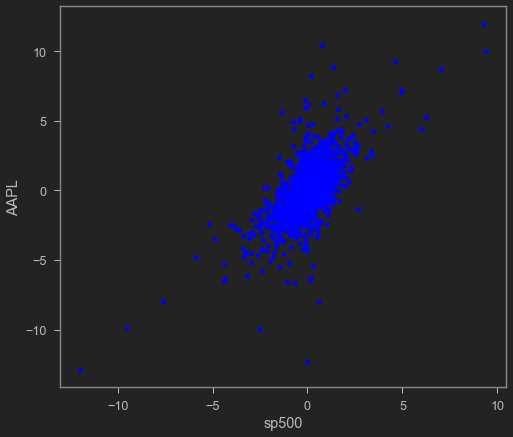

In [25]:
# plot scatter plot between selected stock and sp500
stocks_daily_return.plot(kind='scatter', x='sp500', y='AAPL', color='blue')

In [26]:
# Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)
beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['AAPL'], 1)
print(f"Beta for AAPL stock is {beta}\nAlpha is {alpha}")

Beta for AAPL stock is 1.11289241486781
Alpha is 0.05281208469440287


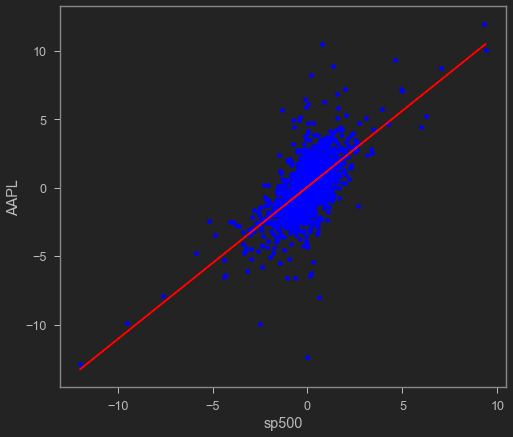

In [27]:
# plot scatter and line together
stocks_daily_return.plot(kind='scatter', x='sp500', y='AAPL', color='blue')
plt.plot(stocks_daily_return['sp500'], beta * stocks_daily_return['sp500'] + alpha, color='red')

In [28]:
# beta for TESLA stock
# beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['TSLA'], 1)
# print(f"Beta for TESLA stock is {beta}\nAlpha is {alpha}")

In [29]:
# plot scatter and line together
# stocks_daily_return.plot(kind='scatter', x='sp500', y='TSLA', color='blue')
# plt.plot(stocks_daily_return['sp500'], beta * stocks_daily_return['sp500'] + alpha, color='red')

# Apply CAPM Formula to Individual Stock

In [30]:
beta

1.11289241486781

In [31]:
# calculate average daily return for S&P500
stocks_daily_return['sp500'].mean()

0.049316006600389206

In [32]:
# calculate the annualized rate of return for S&P500 
# Note that out of 365 days/year, stock exchanges are closed for 104 days during weekend days (Saturday and Sunday) 
# Check your answers with: https://dqydj.com/sp-500-return-calculator/
rm = stocks_daily_return['sp500'].mean() * 252
rm

12.42763366329808

In [34]:
# assume risk free rate is zero
# Also you can use the yield of a 10-years U.S. Government bond as a risk free rate
rf = 0 

# calculate return for any security (APPL) using CAPM  
ER_AAPL = rf + ( beta * (rm-rf) )
ER_AAPL

13.830619238640288

# Calculate Beta for All Stocks

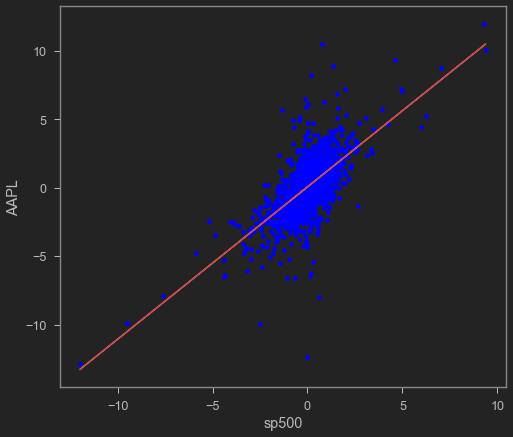

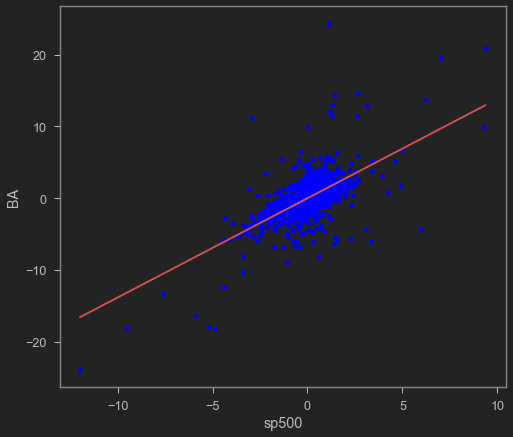

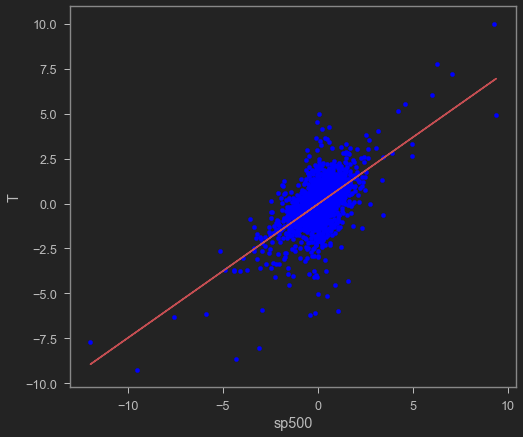

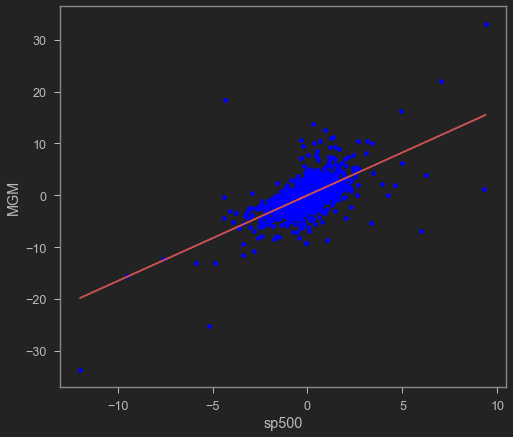

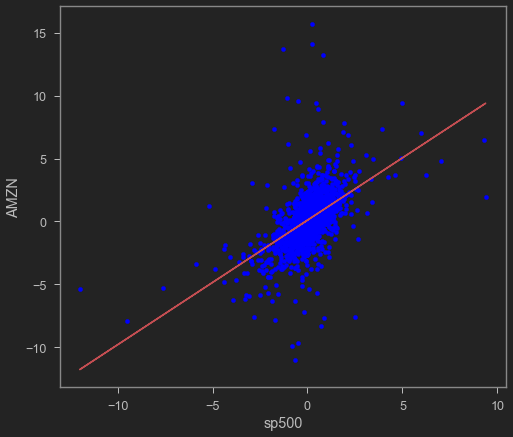

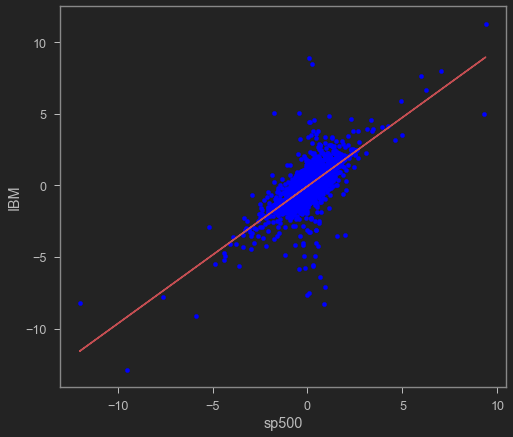

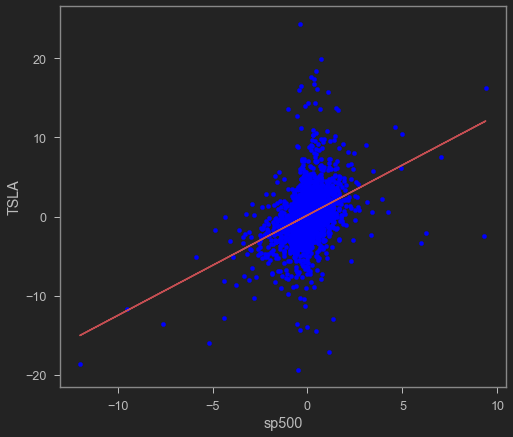

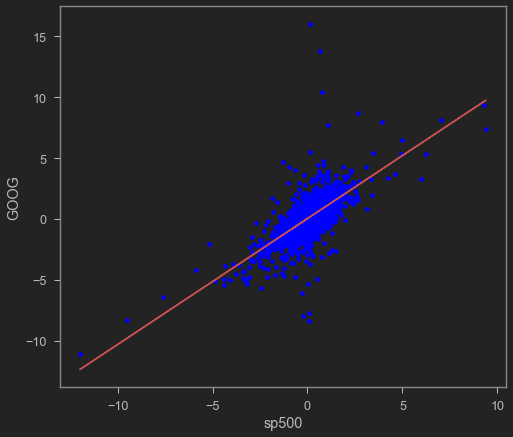

In [35]:
# create dictionaries for betas and alphas
beta = {}
alpha = {}

for i in stocks_daily_return.columns:
    if i!='Date' and i!='sp500':
        # plot scatter plot
        stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = i, color='blue')
        
            # Fit a polynomial between each stock and the S&P500 (Poly with order = 1 is a straight line)
        b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)
        plt.plot(stocks_daily_return['sp500'], b * stocks_daily_return['sp500'] + a, '-', color = 'r')
        
        # add values to dictionaries
        beta[i] = b
        alpha[i] = a

        plt.show()

In [36]:
beta

{'AAPL': 1.11289241486781,
 'BA': 1.382867201089278,
 'T': 0.7446293454747845,
 'MGM': 1.6535677065180123,
 'AMZN': 0.9917345712576845,
 'IBM': 0.9604149148095246,
 'TSLA': 1.2686150101095912,
 'GOOG': 1.034881768742856}

In [38]:
# Alpha describes the strategy's ability to beat the market (S&P500)
# Alpha indicates the “excess return” or “abnormal rate of return,” 
# A positive 0.175 alpha for Tesla means that the portfolio’s return exceeded the benchmark S&P500 index by 17%
alpha

{'AAPL': 0.05281208469440287,
 'BA': -0.002290698329753175,
 'T': -0.028563430198461675,
 'MGM': -0.016885305520478608,
 'AMZN': 0.10221396417765237,
 'IBM': -0.053454941504451015,
 'TSLA': 0.17583492165165865,
 'GOOG': 0.03335558721467021}

In [39]:
# interactive plot for daily return of each stock against market
# plot best fit line too
for i in stocks_daily_return.columns:  
  if i != 'Date' and i != 'sp500':    
    # plotly express to plot the scatter plot for every stock vs. the S&P500
    fig = px.scatter(stocks_daily_return, x = 'sp500', y = i, title = i)

    # fit a straight line to the data and obtain beta and alpha
    b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)
    
    # plot the straight line 
    fig.add_scatter(x = stocks_daily_return['sp500'], y = b*stocks_daily_return['sp500'] + a)
    fig.show()

# Apply CAPM Formula to Calculate Return of Portfolio

In [40]:
# get list of all stock names
keys = list(beta.keys())
keys

['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG']

In [41]:
# define expected return dictionary
ER = {}
rf = 0 # assume risk free rate is zero in this case
# expected return of the market 
rm = stocks_daily_return['sp500'].mean() * 252 
rm

12.42763366329808

In [43]:
for i in keys:
    # Calculate return for every security using CAPM 
    ER[i] = rf + ( beta[i] * (rm-rf) )
    print(f'Expected Return Based on CAPM for {i} is {ER[i]}%')    

Expected Return Based on CAPM for AAPL is 13.830619238640288%
Expected Return Based on CAPM for BA is 17.185766980127905%
Expected Return Based on CAPM for T is 9.253980720502048%
Expected Return Based on CAPM for MGM is 20.54993369406585%
Expected Return Based on CAPM for AMZN is 12.324913942818489%
Expected Return Based on CAPM for IBM is 11.935684726020405%
Expected Return Based on CAPM for TSLA is 15.76588260540319%
Expected Return Based on CAPM for GOOG is 12.861131506762176%


In [44]:
# assume equal weights in the portfolio
portfolio_weights = 1/8 * np.ones(8) 
portfolio_weights

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [45]:
# calculate the portfolio return 
ER_portfolio = sum(list(ER.values()) * portfolio_weights)
ER_portfolio

14.213489176792542

In [51]:
print(f'Expected Return Based on CAPM for the portfolio is {round(ER_portfolio,2)}%')

Expected Return Based on CAPM for the portfolio is 14.21%


In [52]:
# Calculate the expected return for the portfolio assuming we only have 50% allocation in Apple and 50% in Amazon
ER_portfolio = 0.5 * ER['AAPL'] +  0.5 * ER['AMZN']
ER_portfolio

13.07776659072939

In [53]:
ER['AAPL']

13.830619238640288

In [54]:
ER['AMZN']

12.324913942818489